In [1]:
#import pyCGM.metrics as cgm
import pandas as pd
import numpy as np
import copy
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, cohen_kappa_score
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
import sys
sys.path.append("/Users/cr591/OneDrive - University of Exeter/Desktop/pyCGM/pyCGM")
import metrics as cgm

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, DotProduct, WhiteKernel, Matern, ConstantKernel as C
import sklearn.gaussian_process.kernels as k

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv('dexcom_data_rounded_5_min_interpolated.csv')

In [2]:
df = pd.read_csv('~/OneDrive - University of Exeter/Desktop/PhD/Projects/interpolation-for-hypo-detection/dexcom-maths-exploration/data/tidy_data/interp_dataset.csv')

In [3]:
df.time = pd.to_datetime(df.time)

In [7]:
sub_df = df[(df.ID=='2028_baseline') & (df.time>='2018-03-08 21:00') & (df.time<='2018-03-09 01:45')]

In [10]:
sub_df = df[(df.ID=='1004_6months') & (df.time>='18/09/2018 19:15') & (df.time<='18/09/2018 21:45')]

In [ ]:
fig, ax = plt.subplots(figsize=(50,10))
ls = [900]

def update(iteration):
    ax.cla()
    k = gpy.kern.RBF(1)
    k.lengthscale = ls[iteration]
    m = gpy.models.GPRegression(train_X, train_Y, k)
    m.Gaussian_noise = 0
    m.plot(ax=ax)
    ax.plot(test_X, test_Y, 'mo', mew=2, label='Test points')
    
    ax.legend()
    ax.set_title('Length scale = %s, MAE = %s' %(k.lengthscale[0], mean_absolute_error(test_Y,  m.predict_noiseless(test_X)[0].flatten())));
    fig.tight_layout()
    print('Length scale = %s, MAE = %s' %(k.lengthscale[0], mean_absolute_error(test_Y,  m.predict_noiseless(test_X)[0].flatten())));

num_iterations = len(ls)
anim = FuncAnimation(fig, update, frames=np.arange(0, num_iterations, 1), interval=500)
plt.close()

rc('animation', html='jshtml')
anim
    

In [15]:
sub_df.head()

,time,glc,ID,cut_glc,glc_linear,glc_pchip,glc_spline,glc_akima,glc_poly_5,glc_poly_3,cut_glc_linear,cut_glc_pchip,cut_glc_spline,cut_glc_akima,cut_glc_poly_5,cut_glc_poly_3
899426,2018-09-18 19:15:00,NaN,1004_6months,NaN,4.532,4.511365,4.519625,4.530673,4.520630,4.519625,4.632,4.616338,4.560737,4.625054,4.520017,4.560737
899427,2018-09-18 19:16:00,4.5,1004_6months,NaN,4.500,4.500000,4.500000,4.500000,4.500000,4.500000,4.610,4.596913,4.545181,4.604120,4.508423,4.545181
899428,2018-09-18 19:17:00,NaN,1004_6months,NaN,4.500,4.500000,4.492203,4.483881,4.489017,4.492203,4.588,4.577729,4.531984,4.583312,4.500791,4.531984
899429,2018-09-18 19:18:00,NaN,1004_6months,NaN,4.500,4.500000,4.492947,4.487911,4.486807,4.492947,4.566,4.558615,4.521008,4.562562,4.496685,4.521008
899430,2018-09-18 19:19:00,NaN,1004_6months,NaN,4.500,4.500000,4.497590,4.500000,4.490690,4.497590,4.544,4.539403,4.512111,4.541804,4.495592,4.512111


MovieWriter ffmpeg unavailable; using Pillow instead.


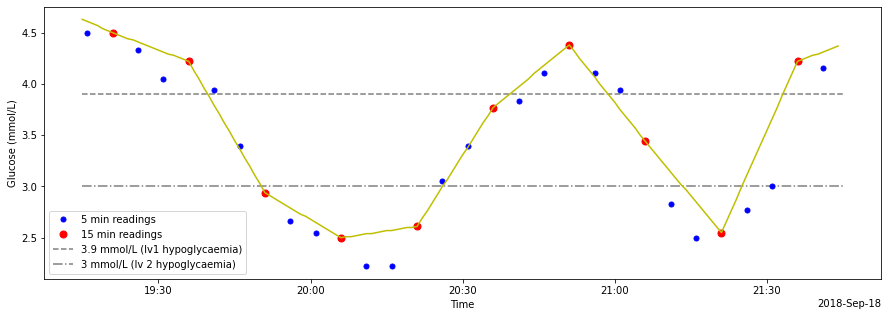

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

'''x = np.linspace(0, 10, 100)
y = np.sin(x)'''

x = np.array(sub_df.time)
y = np.array(sub_df.linear)

'''y2 = np.array(sub_df.cut_glc_linear)

y3 = np.array(sub_df.cut_glc_poly_5)'''

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(sub_df.time, sub_df.glc,'bo', label='5 min readings', 
        markersize= 5)
# Plotting irregular flash readings
ax.plot(sub_df.time, sub_df.cut_glc,'ro', 
        label='15 min readings', markersize=7)
# Lines to show hypo and hyper-glycemia
plt.hlines(y=3.9, color='tab:gray', linestyles='--',xmin=sub_df.time.min(), 
           xmax=sub_df.time.max(), label='3.9 mmol/L (lv1 hypoglycaemia)')
plt.hlines(y=3, color='tab:gray', linestyles='-.',xmin=sub_df.time.min(), 
           xmax=sub_df.time.max(), label='3 mmol/L (lv 2 hypoglycaemia)')

locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

ax.legend()
ax.set_ylabel('Glucose (mmol/L)')
ax.set_xlabel('Time')

line, = ax.plot(x, y, color='y', label='Linear interpolation')

'''line2, = ax.plot(x, y2, color='y', label='Linear')

line3, = ax.plot(x, y3, color='c', label='Poly 5')
'''
def update(num, x, y, line):
    line.set_data(x[:num], y[:num])
    #line.axes.axis([0, 10, 0, 1])
    return line,

ani = animation.FuncAnimation(fig, update, len(x), fargs=[x, y, line],
                              interval=30, blit=True)

'''ani = animation.FuncAnimation(fig, update, len(x), fargs=[x, y2, line2],
                              interval=25, blit=True)

ani = animation.FuncAnimation(fig, update, len(x), fargs=[x, y3, line3],
                              interval=25, blit=True)'''

ani.save('interp_linear.gif')
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


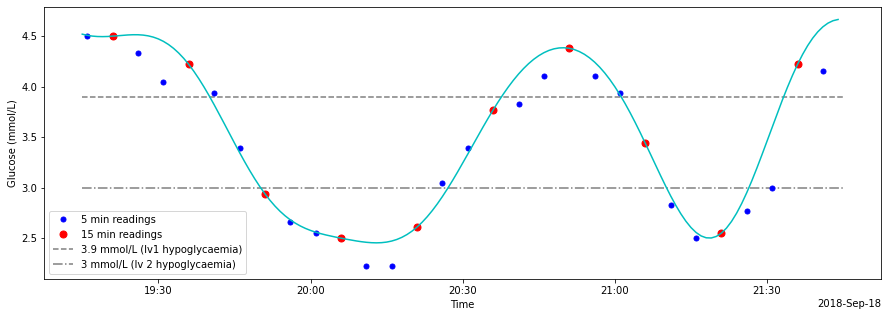

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

x = np.array(sub_df.time)
y = np.array(sub_df.cut_glc_poly_5)


fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(sub_df.time, sub_df.glc,'bo', label='5 min readings', 
        markersize= 5)
# Plotting irregular flash readings
ax.plot(sub_df.time, sub_df.cut_glc,'ro', 
        label='15 min readings', markersize=7)
# Lines to show hypo and hyper-glycemia
plt.hlines(y=3.9, color='tab:gray', linestyles='--',xmin=sub_df.time.min(), 
           xmax=sub_df.time.max(), label='3.9 mmol/L (lv1 hypoglycaemia)')
plt.hlines(y=3, color='tab:gray', linestyles='-.',xmin=sub_df.time.min(), 
           xmax=sub_df.time.max(), label='3 mmol/L (lv 2 hypoglycaemia)')

locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

ax.legend()
ax.set_ylabel('Glucose (mmol/L)')
ax.set_xlabel('Time')

line, = ax.plot(x, y, color='c', label='Polynomial interpolation')

def update(num, x, y, line):
    line.set_data(x[:num], y[:num])
    return line,

ani = animation.FuncAnimation(fig, update, len(x), fargs=[x, y, line],
                              interval=30, blit=True)

ani.save('interp_poly.gif')
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


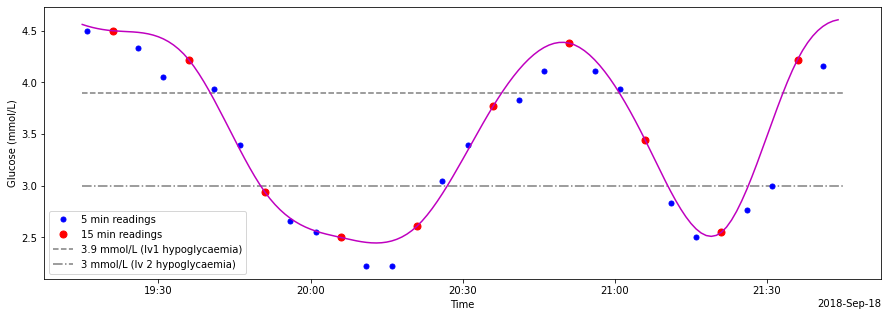

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

x = np.array(sub_df.time)
y = np.array(sub_df.cut_glc_spline)


fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(sub_df.time, sub_df.glc,'bo', label='5 min readings', 
        markersize= 5)
# Plotting irregular flash readings
ax.plot(sub_df.time, sub_df.cut_glc,'ro', 
        label='15 min readings', markersize=7)
# Lines to show hypo and hyper-glycemia
plt.hlines(y=3.9, color='tab:gray', linestyles='--',xmin=sub_df.time.min(), 
           xmax=sub_df.time.max(), label='3.9 mmol/L (lv1 hypoglycaemia)')
plt.hlines(y=3, color='tab:gray', linestyles='-.',xmin=sub_df.time.min(), 
           xmax=sub_df.time.max(), label='3 mmol/L (lv 2 hypoglycaemia)')

locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

ax.legend()
ax.set_ylabel('Glucose (mmol/L)')
ax.set_xlabel('Time')

line, = ax.plot(x, y, color='m', label='Spline interpolation')

def update(num, x, y, line):
    line.set_data(x[:num], y[:num])
    return line,

ani = animation.FuncAnimation(fig, update, len(x), fargs=[x, y, line],
                              interval=30, blit=True)

ani.save('interp_spline.gif')
plt.show()

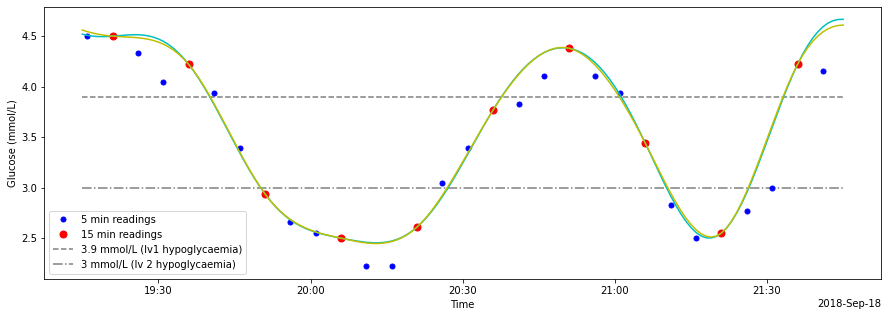

In [30]:
x = np.array(sub_df.time)
y = np.array(sub_df.cut_glc_poly_5)
y1 = np.array(sub_df.cut_glc_spline)


fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(sub_df.time, sub_df.glc,'bo', label='5 min readings', 
        markersize= 5)
# Plotting irregular flash readings
ax.plot(sub_df.time, sub_df.cut_glc,'ro', 
        label='15 min readings', markersize=7)
# Lines to show hypo and hyper-glycemia
plt.hlines(y=3.9, color='tab:gray', linestyles='--',xmin=sub_df.time.min(), 
           xmax=sub_df.time.max(), label='3.9 mmol/L (lv1 hypoglycaemia)')
plt.hlines(y=3, color='tab:gray', linestyles='-.',xmin=sub_df.time.min(), 
           xmax=sub_df.time.max(), label='3 mmol/L (lv 2 hypoglycaemia)')

locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

ax.legend()
ax.set_ylabel('Glucose (mmol/L)')
ax.set_xlabel('Time')

line, = ax.plot(x, y, color='c', label='Polynomial interpolation')
line, = ax.plot(x, y1, color='y', label='spline interpolation')